
# **ECAPA-based Speaker Verification of Virtual Assistants**
## A Transfer Learning Approach

In [1]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt
from singleton_decorator import singleton
from sklearn.metrics import confusion_matrix
from speechbrain.inference import SpeakerRecognition

## **I. Text-Independent Speaker Verification**



In [2]:
@singleton
class AS:
    def __init__(self):
        self.predictions, self.scores = [], []
        self.verification = SpeakerRecognition.from_hparams(source="speechbrain/spkrec-ecapa-voxceleb", savedir="pretrained_models/spkrec-ecapa-voxceleb")
        self._warm_up()

    def _warm_up(self):
        self.verification.verify_files("./24.wav", "./22.wav")
    
    def verification_score(self, file_1, file_2):
        prediction, score = self.verification.verify_files(file_1, file_2)
        self._metrics(prediction, score)
        return prediction, score

    def _metrics(self, prediction, score):
        tensor_value = torch.tensor(prediction)
        bool_value=tensor_value.item()
        self.predictions.append(bool_value)
        self.scores.append(score.item())

    def refresh(self):
        self.predictions = []
        self.scores = []

#### **Confusion Matrix I**

In [3]:
def Confusion_Matrix(originalResult, predict):
    def acc(cm):
        TN1=cm[0][0]
        FP1=cm[0][1]
        FN1=cm[1][0]
        TP1=cm[1][1]

        acc1= (TP1+TN1)/(TP1+TN1+FN1+FP1)
        print("Accuracy:", acc1) 
    
    def precision(cm):
        FP1=cm[0][1]
        TP1=cm[1][1]

        precision1=(TP1)/(TP1+FP1)
        print("Precision:", precision1)
        return precision1

    def recall(cm):
        FN1=cm[1][0]
        TP1=cm[1][1]

        recall1=(TP1)/(TP1+FN1)
        print("Recall:", recall1)
        return recall1

    def f_score(precision1, recall1):
        f1_score1=(2*precision1*recall1)/(precision1+recall1)
        print("F1 Score:", f1_score1)

    cm = confusion_matrix(originalResult, predict)

    acc(cm)
    f_score(recall(cm), precision(cm))

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True)
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.title('\nConfusion Matrix for Speaker Verification\n')
    plt.show()

#### **Evaluation**

In [4]:
original_prediction = []
speaker_verification = AS()

/home/tnc/anaconda3/envs/Speaker_Verification/lib/python3.10/site-packages/speechbrain/utils/autocast.py:68: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  wrapped_fwd = torch.cuda.amp.custom_fwd(fwd, cast_inputs=cast_inputs)
/home/tnc/anaconda3/envs/Speaker_Verification/lib/python3.10/site-packages/speechbrain/utils/checkpoints.py:194: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mo

/tmp/ipykernel_27333/2103230156.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor_value = torch.tensor(prediction)


Accuracy: 0.9682539682539683
Recall: 0.9682539682539683
Precision: 1.0
F1 Score: 0.9838709677419354


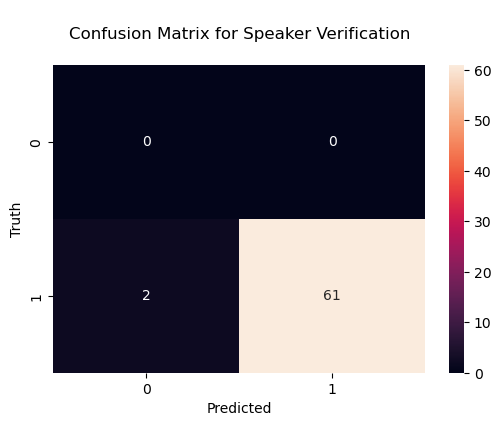

************************************************


/tmp/ipykernel_27333/2103230156.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor_value = torch.tensor(prediction)


Accuracy: 0.7086614173228346
Recall: nan
Precision: 0.0
F1 Score: nan


/tmp/ipykernel_27333/319859658.py:23: RuntimeWarning: invalid value encountered in scalar divide
  recall1=(TP1)/(TP1+FN1)


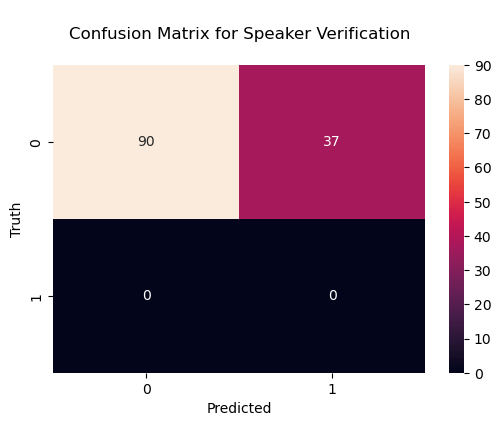

In [5]:
with open('trial_true.txt', 'r') as f:
    for line in f:
        parts = line[:-1].split(' ')
        p1, p2, dec = parts
        original_prediction.append(True if dec=='True' else False)
        
        speaker_verification.verification_score(p1, p2)

Confusion_Matrix(original_prediction, speaker_verification.scores)
speaker_verification.refresh()
original_prediction = []
print("************************************************")

with open('trial_false.txt', 'r') as f:
    for line in f:
        parts = line[:-1].split(' ')
        p1, p2, dec = parts
        original_prediction.append(True if dec=='True' else False)
        
        speaker_verification.verification_score(p1, p2)

Confusion_Matrix(original_prediction, speaker_verification.scores)

/tmp/ipykernel_27333/2103230156.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor_value = torch.tensor(prediction)


Accuracy: 0.7947368421052632
Recall: 0.9682539682539683
Precision: 0.6224489795918368
F1 Score: 0.7577639751552796


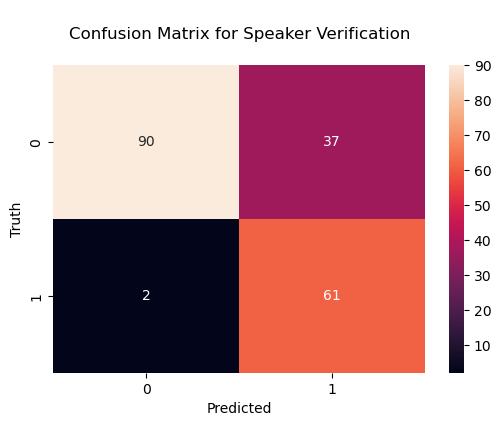

In [7]:
speaker_verification.refresh()
original_prediction = []

with open('trial_true.txt', 'r') as f:
    for line in f:
        parts = line[:-1].split(' ')
        p1, p2, dec = parts
        original_prediction.append(True if dec=='True' else False)
        
        speaker_verification.verification_score(p1, p2)

with open('trial_false.txt', 'r') as f:
    for line in f:
        parts = line[:-1].split(' ')
        p1, p2, dec = parts
        original_prediction.append(True if dec=='True' else False)
        
        speaker_verification.verification_score(p1, p2)

Confusion_Matrix(original_prediction, speaker_verification.scores)